<a href="https://colab.research.google.com/github/IlTACK-OH/pandas_practice/blob/main/day5/12_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# datetime 라이브러리
`datetime`라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러이이다.<br>`datetime`라이브러리에는 총 3개의 오브젝트가 포함되어 있으며 다음과 같다.<br>
> **`date`**: 날짜를 처리하는 오브젝트<br>
**`time`**: 시간을 처리하는 오브젝트<br>
**`datetime`**: 날짜와 시간을 모두 처리하는 오브젝트<br>




# datetime 오브젝트 사용하기

In [1]:
from datetime import datetime

In [3]:
now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2022-10-16 15:54:41.147046
2022-10-16 15:54:41.149891


다음은 datetime오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달한 것이다.<br>
각 변수를 출력하여 확인해 보면 입력한 시간을 바탕으로 `datetime`오브젝트가 생성된 것을 알 수 있다.

In [4]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2022-10-16 15:57:25.686278
1970-01-01 00:00:00
1970-12-12 13:24:34


`datetime`오브젝트의 사용 이유 중 하나는 시간 계산을 할 수 있다는 점이다.

In [5]:
diff1 = t1 - t2
print(diff1)
print(type(diff1))

19281 days, 15:57:25.686278
<class 'datetime.timedelta'>


In [6]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-19282 days, 8:02:34.313722
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환하기

경우에 따라 시계열 데이터를 문자열로 저장해야 할 때도 있다.<br>하지만 문자열은 시간 계산을 할 수 없기 때문에 `datetime`오브젝트로 변환해 주어야 한다.

In [9]:
import pandas as pd
import os

In [10]:
from google.colab import files
files.upload();

Saving country_timeseries.csv to country_timeseries.csv


In [12]:
ebola = pd.read_csv('country_timeseries.csv')
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

date열이 `object`type으로 저장되어 있다.<br>
이를 `to_datetime`메서드를 사용하면 `datetime`오브젝트로 변환할 수 있다.

In [14]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

`to_datetime`메서드에서 시간 형식 지정자와 기호를 적절히 조합하여 `format`인자에 전달하면<br> 그 형식에 맞게 정리된 `datetime`오브젝트를 얻을 수 있다.

In [17]:
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

test_df1

,order_day,date_dt1,date_dt2,date_dt3
0,01/01/15,2015-01-01,2015-01-01,2001-01-15
1,02/01/15,2015-01-02,2015-02-01,2002-01-15
2,03/01/15,2015-01-03,2015-03-01,2003-01-15


In [18]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'],format = '%d-%m-%y')
test_df2

,order_day,date_dt
0,01-01-15,2015-01-01
1,02-01-15,2015-01-02
2,03-01-15,2015-01-03


# 시계열 데이터를 잘라내고 싶어요

`now`메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현한다.<br>`now`메서드로 얻은 시계열 데이터를 잘라내고 싶다면 `strftime`메서드와<br> 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낼 수 있다.

In [19]:
now = datetime.now()
print(now)

2022-10-16 16:15:24.483753


In [20]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2022-10-16


In [21]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

16:15:24


In [22]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2022-10-16 16:15:24


# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

`read_csv`메서드의 `parse_dates`인자에 `datetime`오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터를 불러온다.

In [23]:
ebola1 = pd.read_csv('country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# datetime 오브젝트에서 날짜 정보 추출하기

In [25]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

`datetime`오브젝트의 year,month,day 속성을 이용하면 년,월,일 정보를 바로 추출할 수 있다.

In [27]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


# dt 접근자로 시간 데이터 정리하기

`datetime`오브젝트에 dt접근자를 사용하면 `datetime`속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다.

In [28]:
ebola = pd.read_csv('country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [30]:
ebola[['Date','date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [31]:
ebola['date_dt'][3].year

2015

In [32]:
ebola['date_dt'][3].month

1

In [33]:
ebola['date_dt'][3].day

2

위 방법은 특정 인덱스로 접근해야 하기 때문에 불편하다. 다음은 dt접근자로 `date_dt`열에 한 번에 접근한 다음 `year`속성을 이용하여 연도값을 추출한 것이다.

In [34]:
ebola['year'] = ebola['date_dt'].dt.year
ebola[['Date','date_dt','year']].head()

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015
3,1/2/2015,2015-01-02,2015
4,12/31/2014,2014-12-31,2014


다음은 월,일 데이터를 한번에 추출해서 새로운 얄로 추가한 것이다.

In [35]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)
ebola[['Date','date_dt','year','month','day']].head()

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


In [36]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 에볼라 최초 발생일 계산해보기

ebola데이터프레임은 데이터가 시간 역순으로 정렬되어 있다.<br>즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 한다.

In [37]:
ebola.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


In [38]:
# min메서드를 사용하여 최초 발병일 찾기
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [39]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
ebola[['Date','Day','outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


# 파산한 은행의 개수 계산하기

In [40]:
banks = pd.read_csv('banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [42]:
banks_no_dates = pd.read_csv('banklist.csv')
banks_no_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [43]:
banks = pd.read_csv('banklist.csv',parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [46]:
banks['closing-quater'],banks['closing_year'] = (banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing-quater,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


In [47]:
closing_year = banks.groupby(['closing_year']).size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [52]:
closing_year_q = banks.groupby(['closing_year','closing-quater']).size()
closing_year_q

closing_year  closing-quater
2000          4                  2
2001          1                  1
              2                  1
              3                  2
2002          1                  6
              2                  2
              3                  1
              4                  2
2003          1                  1
              2                  1
              4                  1
2004          1                  3
              2                  1
2007          1                  1
              3                  1
              4                  1
2008          1                  2
              2                  2
              3                  9
              4                 12
2009          1                 21
              2                 24
              3                 50
              4                 45
2010          1                 41
              2                 45
              3                 41
              4           

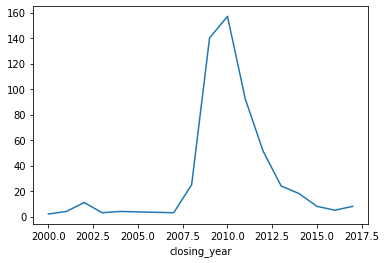

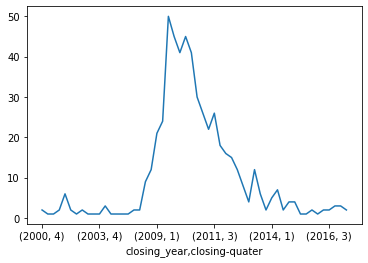

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

# 테슬라 주식 데이터로 시간 계산하기

In [55]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

# tesla에는 데이터프레임이 저장된다.
tesla = pdr.get_data_quandl('TSLA',api_key = '7jWzr_odvHP3wsE92Wwk')

# tesla에 저장된 데이터프레임을 파일로 저장한다.
tesla.to_csv('tesla_stock_quandl.csv')

In [80]:
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [73]:
tesla = pd.read_csv('tesla_stock_quandl.csv',parse_dates=[0])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        110 non-null    datetime64[ns]
 1   Open        110 non-null    float64       
 2   High        110 non-null    float64       
 3   Low         110 non-null    float64       
 4   Close       110 non-null    float64       
 5   Volume      110 non-null    float64       
 6   ExDividend  110 non-null    float64       
 7   SplitRatio  110 non-null    float64       
 8   AdjOpen     110 non-null    float64       
 9   AdjHigh     110 non-null    float64       
 10  AdjLow      110 non-null    float64       
 11  AdjClose    110 non-null    float64       
 12  AdjVolume   110 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 11.3 KB


In [81]:
tesla.loc[(tesla.Date.dt.year==2018)& (tesla.Date.dt.month == 2)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
19,2018-02-28,352.57,355.2400,342.2200,343.060,6042895.0,0.0,1.0,352.57,355.2400,342.2200,343.060,6042895.0
20,2018-02-27,356.25,359.9900,350.0100,350.990,4761537.0,0.0,1.0,356.25,359.9900,350.0100,350.990,4761537.0
21,2018-02-26,353.50,359.0000,352.3550,357.420,4312871.0,0.0,1.0,353.50,359.0000,352.3550,357.420,4312871.0
22,2018-02-23,347.83,354.9900,347.1000,352.050,5790795.0,0.0,1.0,347.83,354.9900,347.1000,352.050,5790795.0
23,2018-02-22,335.53,347.4400,334.7501,346.170,6940349.0,0.0,1.0,335.53,347.4400,334.7501,346.170,6940349.0
24,2018-02-21,336.03,339.6929,333.1700,333.300,3181755.0,0.0,1.0,336.03,339.6929,333.1700,333.300,3181755.0
25,2018-02-20,334.47,340.8400,331.5000,334.770,3996951.0,0.0,1.0,334.47,340.8400,331.5000,334.770,3996951.0
26,2018-02-16,332.50,343.1200,331.6400,335.490,5585810.0,0.0,1.0,332.50,343.1200,331.6400,335.490,5585810.0
27,2018-02-15,324.50,334.1200,322.4000,334.065,5892048.0,0.0,1.0,324.50,334.1200,322.4000,334.065,5892048.0
28,2018-02-14,320.84,326.1700,318.5200,322.310,3930911.0,0.0,1.0,320.84,326.1700,318.5200,322.310,3930911.0


# datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기

In [82]:
tesla.index=tesla['Date']
tesla.index

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2017-10-30', '2017-10-27', '2017-10-26', '2017-10-25',
               '2017-10-24', '2017-10-23', '2017-10-20', '2017-10-19',
               '2017-10-18', '2017-10-17'],
              dtype='datetime64[ns]', name='Date', length=110, freq=None)

In [83]:
tesla['2017'].iloc[:5,:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close
Date,,,,,
2017-12-29,2017-12-29,316.18,316.4100,310.00,311.35
2017-12-28,2017-12-28,311.75,315.8200,309.54,315.36
2017-12-27,2017-12-27,316.00,317.6800,310.75,311.64
2017-12-26,2017-12-26,323.83,323.9400,316.58,317.29
2017-12-22,2017-12-22,329.51,330.9214,324.82,325.20


In [87]:
tesla.loc['2017-12'].iloc[:,:5]

,Date,Open,High,Low,Close
Date,,,,,
2017-12-29,2017-12-29,316.18,316.4100,310.00,311.35
2017-12-28,2017-12-28,311.75,315.8200,309.54,315.36
2017-12-27,2017-12-27,316.00,317.6800,310.75,311.64
2017-12-26,2017-12-26,323.83,323.9400,316.58,317.29
2017-12-22,2017-12-22,329.51,330.9214,324.82,325.20
2017-12-21,2017-12-21,329.59,333.7400,327.21,331.66
2017-12-20,2017-12-20,332.69,333.1000,325.04,328.98
2017-12-19,2017-12-19,340.26,341.4925,330.30,331.10
2017-12-18,2017-12-18,344.90,346.7300,337.58,338.87


# 시간 간격을 인덱스로 설정하여 데이터 추출하기

In [88]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,161 days
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,160 days
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,157 days
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,156 days
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,155 days


In [90]:
tesla.index = tesla['ref_date']
tesla.iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
161 days,2018-03-27,304.00,304.27,277.18,279.18
160 days,2018-03-26,307.34,307.59,291.36,304.18
157 days,2018-03-23,311.25,311.61,300.45,301.54
156 days,2018-03-22,313.89,318.82,308.18,309.10
155 days,2018-03-21,310.25,322.44,310.19,316.53


In [91]:
tesla['5 days':].iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
3 days,2017-10-20,352.69,354.5500,344.34,345.10
2 days,2017-10-19,355.56,357.1465,348.20,351.81
1 days,2017-10-18,355.97,363.0000,354.13,359.65
0 days,2017-10-17,350.91,356.2200,350.07,355.75


# 시간 범위 생성하여 인덱스로 지정하기

In [119]:
ebola = pd.read_csv('country_timeseries.csv',parse_dates=[0])
ebola.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [120]:
ebola.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [121]:
head_range = pd.date_range(start = '2014-12-31', end = '2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [122]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
ebola_5.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


# 시간 범위의 주기 설정하기

`date_range`메서드의 freq인잣값을 B로 설정하여 평일만 포함시킨 DatetimeIndex를 만들어보겠다.

In [123]:
pd.date_range('2017-01-01','2017-01-07',freq='B')


DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')

# 에볼라 발병 시간 비교하기

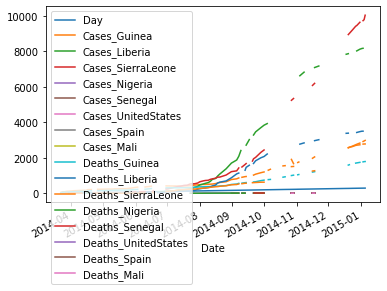

In [124]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig,ax = plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)
#ax.lengend(fontsize = 7, loc=2, borderaxespad =0.)
plt.show()

In [125]:
ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia']]
ebola_sub.tail(10)

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2014-04-04,13,143.0,18.0
2014-04-01,10,127.0,8.0
2014-03-31,9,122.0,8.0
2014-03-29,7,112.0,7.0
2014-03-28,6,112.0,3.0
2014-03-27,5,103.0,8.0
2014-03-26,4,86.0,NaN
2014-03-25,3,86.0,NaN
2014-03-24,2,86.0,NaN


In [126]:
ebola = pd.read_csv('country_timeseries.csv',parse_dates = ['Date'])
ebola.head().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [127]:
ebola.tail().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [129]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(),ebola.index.max())

In [130]:
new_idx= reversed(new_idx)

In [131]:
ebola = ebola.reindex(new_idx)

In [132]:
ebola.head().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN


In [133]:
ebola.tail().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2014-03-26,2014-03-26,4.0,86.0,NaN,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,NaN,NaN
2014-03-23,NaT,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,NaN,NaN


In [137]:
last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [138]:
first_valid = ebola.apply(pd.Series.first_valid_index)
first_valid

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]

In [139]:
earlist_date = ebola.index.min()
print(earlist_date)
shift_values = last_valid - earlist_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [140]:
ebola_dict={}
for idx,col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

In [141]:
ebola_shift = pd.DataFrame(ebola_dict)

In [142]:
ebola_shift.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaT,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [143]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)

ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


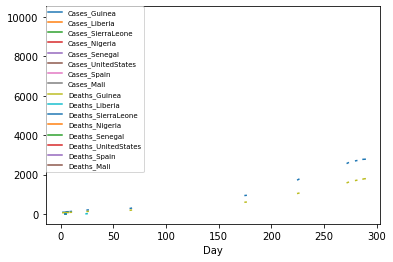

In [144]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7,loc=2, borderaxespad =0)
plt.show()